In [119]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as image
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from libpysal.weights import Queen
from esda.moran import Moran, Moran_Local
import numpy as np
from matplotlib.colors import ListedColormap
from splot.esda import lisa_cluster

sns.set_style("whitegrid")

In [120]:
final = gpd.read_file('data/map/final.json')
district = gpd.read_file('data/map/district.json')
country = gpd.read_file('data/map/vietnam.json')

In [121]:
final = final.to_crs(epsg=32648)
district = district.to_crs(epsg=32648)
country.to_crs(epsg=32648)
final['centroid'] = final.geometry.centroid
centroids = final.copy()
centroids.geometry = centroids['centroid']

In [122]:
final = final.to_crs(epsg=4326)
district = district.to_crs(epsg=4326)
country = country.to_crs(epsg=4326)
centroids = centroids.to_crs(epsg=4326)

In [123]:
country['is_namdinh'] = country['VARNAME_1'] == 'NamDinh'

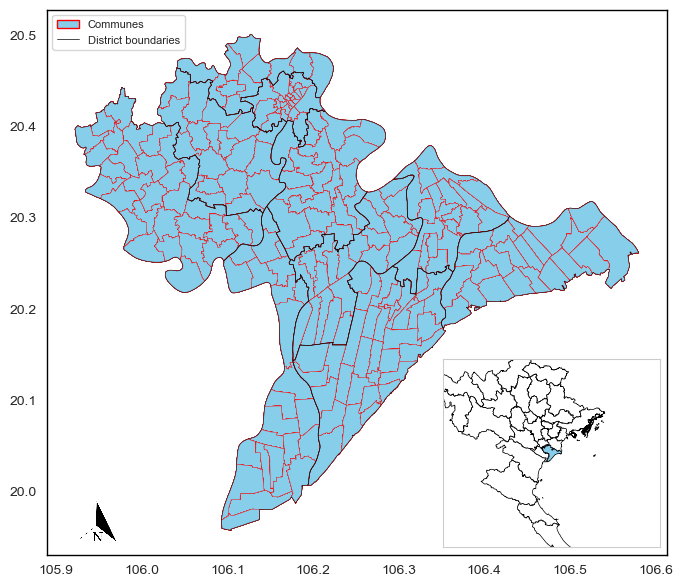

In [124]:
# Set the background color for both the main and inset maps
background_color = 'white'
# Creating the main district and commune map
fig_district, ax_district = plt.subplots(figsize=(8, 8))
ax_district.set_facecolor(background_color)
# Plotting communes with sky blue fill and red edges
final.plot(ax=ax_district, color='skyblue', edgecolor='red', linewidth=0.25)
# Plotting district boundaries in black
district.plot(ax=ax_district, color='none', edgecolor='black', linewidth=0.5, alpha=0.7)
# Creating the inset map
inset_ax = inset_axes(ax_district, width="35%", height="35%", loc=4)  # Bottom right corner
inset_ax.patch.set_facecolor(background_color)
country.plot(ax=inset_ax, color=background_color, edgecolor='black', linewidth=0.5)
# Zoom in on 'is_namdinh' area
namdinh_bounds = country[country['is_namdinh']].total_bounds
padding = 5.0  # Padding around the 'is_namdinh' area
x_range = namdinh_bounds[2] - namdinh_bounds[0]
y_range = namdinh_bounds[3] - namdinh_bounds[1]
inset_ax.set_xlim(namdinh_bounds[0] - x_range * padding, namdinh_bounds[2] + x_range * padding)
inset_ax.set_ylim(namdinh_bounds[1] - y_range * padding, namdinh_bounds[3] + y_range * padding)

country[country['is_namdinh']].plot(ax=inset_ax, color='skyblue', edgecolor='black', linewidth=0.5)
# centroids.plot(ax=ax_district, marker='o', color='red', markersize=1)
inset_ax.set_xticks([])
inset_ax.set_yticks([])

for spine in ax_district.spines.values():
    spine.set_linewidth(1)  # Making the border lines solid
    spine.set_edgecolor('black')  # Setting the border color to black

for spine in inset_ax.spines.values():
    spine.set_visible(True)  

# Removing gridlines
ax_district.grid(False)
inset_ax.grid(False)

# Custom legend for the map with reduced font size
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='red', label='Communes'),
    Line2D([0], [0], color='black', linewidth=0.5, linestyle='-', label='District boundaries')
]

# Adding the custom legend to the plot with a reduced font size
ax_district.legend(handles=legend_elements, loc='upper left', fontsize=8)
ax_district.ticklabel_format(style='plain', axis='y', useOffset=False)

arrow_img = image.imread('data/images/arrow.png')
# Adding the arrow to the bottom left
arrow_position = (0.08, 0.06)  # Adjust as needed
arrowbox = OffsetImage(arrow_img, zoom=0.05)
ab = AnnotationBbox(arrowbox, arrow_position, xycoords='axes fraction', frameon=False)
ax_district.add_artist(ab)

plt.show()

In [125]:
cm = gpd.read_file('data/map/commune.json')

C:\Users\vbui0010\AppData\Local\Temp\ipykernel_2420\3495832603.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = Queen.from_dataframe(cm)


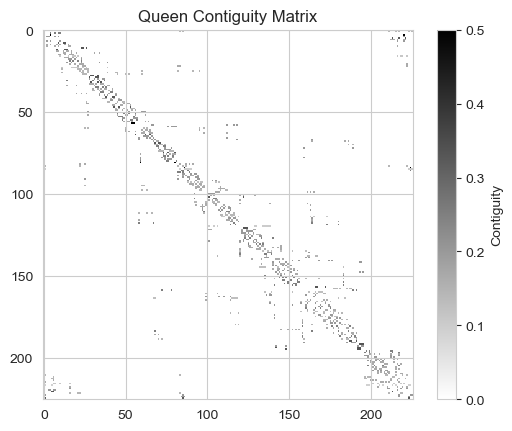

In [126]:
# Assuming 'final' is your GeoDataFrame
cm = cm.sort_values(by='OBJECTID', ascending=True)
wq = Queen.from_dataframe(cm)
wq.transform='R'

# Plot the matrix as a heatmap
plt.imshow(wq.full()[0], cmap='binary', interpolation='nearest')
plt.title('Queen Contiguity Matrix')
plt.colorbar(label='Contiguity')
plt.show()

In [127]:
cm

,OBJECTID,maDonViHan,danhTuChun,diaDanh,Shape_Leng,Shape_Area,MaTinh,TenTinh,MaHuyen,TenHuyen,geometry
225,4,13795,Thị trấn,Lâm,13758.340060,5.158801e+06,36,Tỉnh Nam Định,360,Huyện Ý Yên,"POLYGON ((106.00646 20.33305, 106.00656 20.333..."
29,5,13705,Xã,Nam Vân,16147.285886,5.390298e+06,36,Tỉnh Nam Định,356,Thành phố Nam Định,"POLYGON ((106.18883 20.41508, 106.18890 20.414..."
30,7,13708,Thị trấn,Mỹ Lộc,11884.403165,4.545401e+06,36,Tỉnh Nam Định,358,Huyện Mỹ Lộc,"POLYGON ((106.11260 20.45001, 106.11242 20.449..."
31,8,13711,Xã,Mỹ Hà,13023.989697,8.199065e+06,36,Tỉnh Nam Định,358,Huyện Mỹ Lộc,"POLYGON ((106.13119 20.49737, 106.13164 20.497..."
32,9,13714,Xã,Mỹ Tiến,13322.472476,5.837942e+06,36,Tỉnh Nam Định,358,Huyện Mỹ Lộc,"POLYGON ((106.11823 20.46436, 106.11753 20.463..."
...,...,...,...,...,...,...,...,...,...,...,...
24,246,13720,Xã,Mỹ Trung,12885.042591,6.707869e+06,36,Tỉnh Nam Định,358,Huyện Mỹ Lộc,"POLYGON ((106.18780 20.48046, 106.19031 20.480..."
25,254,13759,Xã,Tân Thành,13495.747824,4.827457e+06,36,Tỉnh Nam Định,359,Huyện Vụ Bản,"POLYGON ((106.16811 20.40507, 106.16925 20.404..."
26,256,13969,Xã,Nam Mỹ,11140.069827,4.336040e+06,36,Tỉnh Nam Định,362,Huyện Nam Trực,"POLYGON ((106.19721 20.41923, 106.19722 20.419..."
27,257,13972,Xã,Điền Xá,19709.349774,1.042039e+07,36,Tỉnh Nam Định,362,Huyện Nam Trực,"POLYGON ((106.21133 20.41712, 106.21179 20.416..."


In [128]:
final_sorted = final.sort_values(by=['OBJECTID', 'year'], ascending=[True, True])

In [129]:
final_sorted['POP_DENS'] = final_sorted['pop'] / (final_sorted['Shape_Area'] / 1000000)

In [130]:
final_sorted['total_pop_year'] = final_sorted.groupby('year')['pop'].transform('sum')

In [131]:
final_sorted['total_case_year'] = final_sorted.groupby('year')['observed'].transform('sum')

In [132]:
notif_data =  final_sorted.groupby('year').agg(total_case_year=('observed', 'sum'), total_pop_year=('pop', 'sum')).reset_index()

In [133]:
notif_data['notification_rate'] = (notif_data['total_case_year'] / notif_data['total_pop_year']) * 100000

In [134]:
notif_data['year'] = notif_data['year'].astype(int)

In [135]:
z = np.polyfit(notif_data['year'], notif_data['notification_rate'], 1)
p = np.poly1d(z)

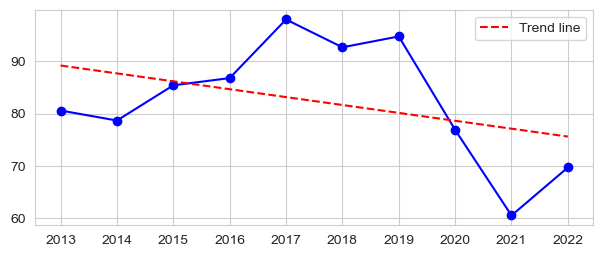

In [136]:
# To plot this, for example:
plt.figure(figsize=(7.2, 2.8))
plt.plot(notif_data['year'], notif_data['notification_rate'], marker='o', linestyle='-', color='b')
plt.plot(notif_data['year'], p(notif_data['year']), 'r--', label='Trend line')
plt.xticks(np.arange(2013, 2023, 1))
plt.legend()
plt.show()

In [137]:
sum(notif_data['total_case_year'])

14887

In [139]:
final_sorted['expected'] = final_sorted['observed'] * final_sorted['total_pop_year'] / final_sorted['pop']

In [140]:
final_sorted['expected'] = final_sorted['pop'] * final_sorted['total_case_year']/ final_sorted['total_pop_year']

In [141]:
final_sorted['smr'] = final_sorted['observed'] / final_sorted['expected'] 

In [142]:
smr_stats = final_sorted['smr'].describe()

In [144]:
for year in final_sorted['year'].unique():  # Assuming there's a 'year' column
    # Filter data for the year
    yearly_data = final_sorted[final_sorted['year'] == year]
    
    # Calculate global Moran's I
    mi = Moran(yearly_data['smr'], wq)
    print(f"Global Moran's I for year {year}: {mi.I}, p-value: {mi.p_sim}")
    
    # Calculate local Moran's I
    local_mi = Moran_Local(yearly_data['smr'], wq)
    local_i = local_mi.Is
    

Global Moran's I for year 2013: 0.09422191047006259, p-value: 0.014
Global Moran's I for year 2014: 0.11701828616461239, p-value: 0.003
Global Moran's I for year 2015: 0.08150283298750113, p-value: 0.03
Global Moran's I for year 2016: 0.09085399489495603, p-value: 0.012
Global Moran's I for year 2017: 0.07074634713451251, p-value: 0.046
Global Moran's I for year 2018: 0.05996974776636488, p-value: 0.061
Global Moran's I for year 2019: 0.1296362578730127, p-value: 0.002
Global Moran's I for year 2020: 0.06911622961367149, p-value: 0.04
Global Moran's I for year 2021: 0.04334089567830817, p-value: 0.134
Global Moran's I for year 2022: 0.05112729098240519, p-value: 0.092


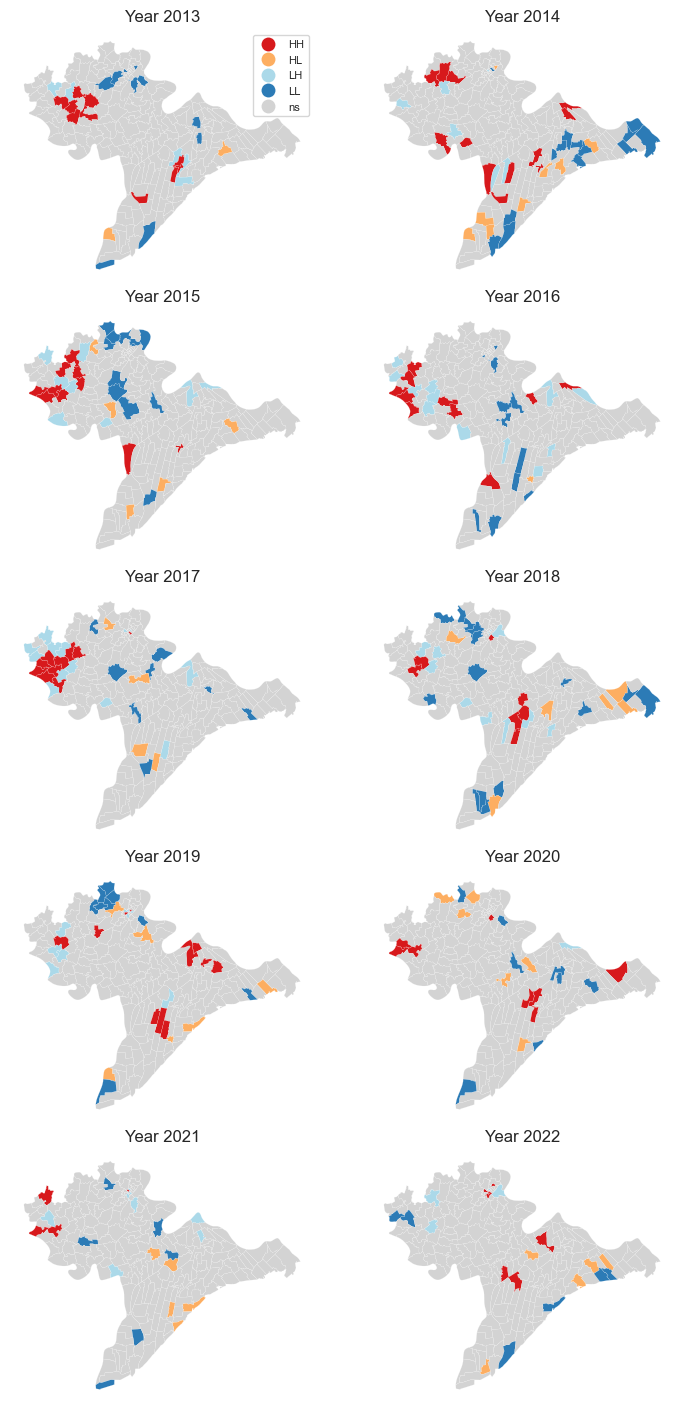

In [145]:
# Assuming 'final_sorted' is your GeoDataFrame and 'wq' is your weights matrix
years = sorted(final_sorted['year'].unique())
num_years = len(years)
cols = 2
rows = (num_years + cols - 1) // cols  # Ceiling division

f, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(7.2, 2.8 * rows), constrained_layout=True)
axs = axs.flatten()  # Flatten for easier indexing


for index, year in enumerate(years):
    yearly_data = final_sorted[final_sorted['year'] == year]
    moran = Moran_Local(yearly_data['smr'], wq)
    ax = axs[index]
    show_legend = True if year == '2013' else False
    legend_kwds = {'fontsize': 8, 'title_fontsize': 'large', 'loc': 'upper right'}
    lisa_cluster(moran, yearly_data, p=0.05, ax=ax, legend=show_legend, legend_kwds=legend_kwds)
    ax.set_title(f"Year {year}")

plt.show()


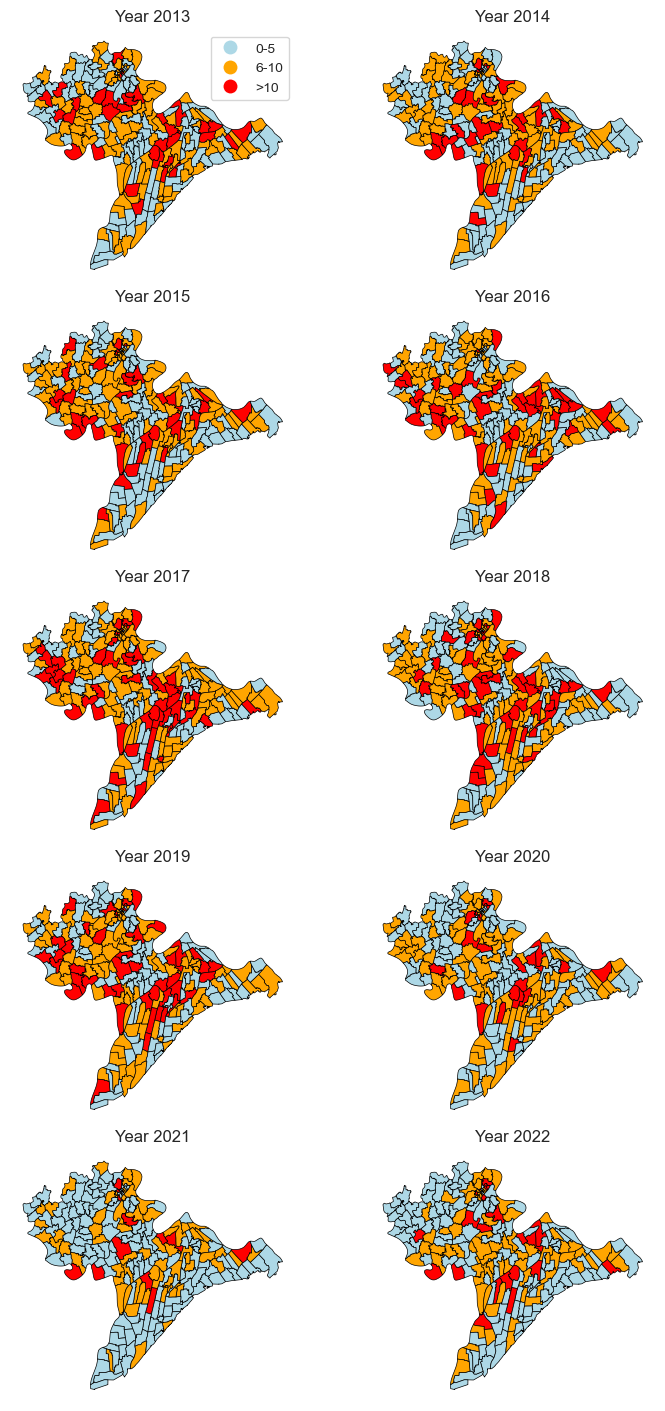

In [146]:
bins = [0, 5, 10, float('inf')]
labels = ['0-5', '6-10', '>10']
# Custom color map for different categories
cmap = ListedColormap(['#add8e6', '#ffa500', '#ff0000'])  # Light blue, orange, red

f, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(7.2, 2.8 * rows), constrained_layout=True)
axs = axs.flatten()  # Flatten for easier indexing

for index, year in enumerate(years):
    yearly_data = final_sorted[final_sorted['year'] == year].copy()
    # Categorize observed values
    yearly_data['category'] = pd.cut(yearly_data['observed'],include_lowest=True, bins=bins, labels=labels, right=True)
    
    # Plotting
    ax = axs[index]
    show_legend = True if year == '2013' else False
    yearly_data.plot(column='category', cmap=cmap, linewidth=0.5, ax=ax, edgecolor='black', legend=show_legend)
    ax.set_title(f"Year {year}")
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

# Hide any unused subplots in the grid
for idx in range(len(years), len(axs)):
    axs[idx].set_visible(False)
plt.show()